c:\Users\houbo\stock-price-predictor\notebooks\../utils\processing_lstm2.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col]=df[col].fillna(method="ffill")
c:\Users\houbo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 28s 123ms/step - loss: 0.0065 - val_loss: 1.4824e-04
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - loss: 6.5598e-04 - val_loss: 1.4352e-04
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - loss: 6.8481e-04 - val_loss: 1.0527e-04
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 5.3871e-04 - val_loss: 8.2355e-05
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 4.6684e-04 - val_loss: 1.1742e-04
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 4.1578e-04 - val_loss: 1.1880e-04
Epoch 7/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - loss: 3.3358e-04 - val_loss: 8.4788e-05
Epoch 8/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 3.1437e-04 - val_loss: 1.2115e-04
Epoch 9/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - loss: 3.6741e-04 - val_loss: 1.8261e-04
Epoch 10/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 34s 113ms/step - loss: 3.2088e-04 - val_loss: 1.2104e-04
Epoch 11/100
183/183 ━━

c:\Users\houbo\stock-price-predictor\notebooks\../models\lstm_model3.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred
C:\Users\houbo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\houbo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


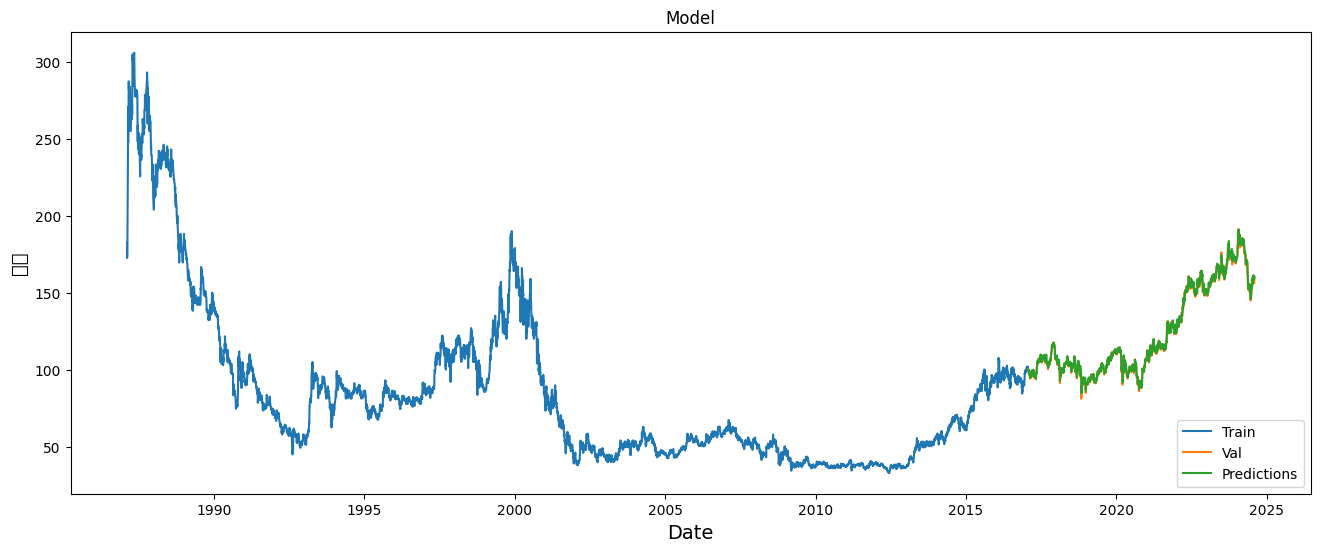

In [3]:
import sys
sys.path.append("../utils")
sys.path.append("../models")

from processing_lstm2 import create_data
from lstm_model3 import LSTM3_build, train_model, predict_and_inverse, plot_predictions

df, sclr, x_train, y_train, x_test, y_test, training_data_len=create_data(r"C:\Users\houbo\stock-price-predictor\notebooks\data\stock_price.csv",col="終値",window=60)

model=LSTM3_build(x_train)
history=train_model(model,x_train,y_train,batch_size=32,epochs=100,validation_split=0.2,patience=20)

y_pred=predict_and_inverse(model,x_test,sclr)

plot_predictions(df, training_data_len,y_pred)

In [4]:
import numpy as np
from sklearn.metrics import r2_score
y_true = df[training_data_len:]
rmse=np.sqrt(np.mean((y_pred-y_true)**2))
print(rmse)
r2=r2_score(y_true,y_pred)
print(r2)

1.5762338540803946
0.9969114065170288
